In [1]:
from modecoupling import Modecoupling
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mode = Modecoupling()
ells1 = np.arange(1, 10000, 1)
ells2 = ells1
t0 = time.time()
M = mode.components(ells1, ells2, Nchi=100)
t1 = time.time()

total = t1-t0
print(total)

19.71997094154358


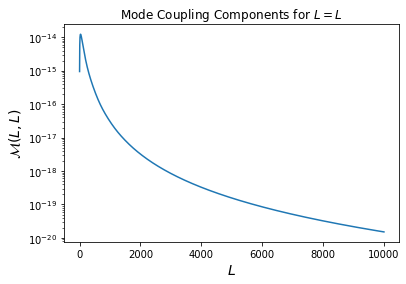

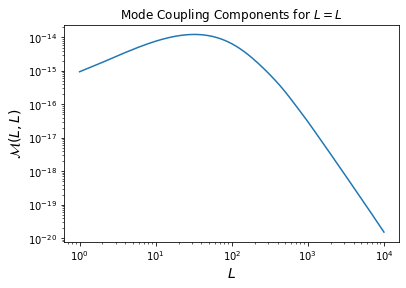

In [3]:
plt.figure()
plt.semilogy(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

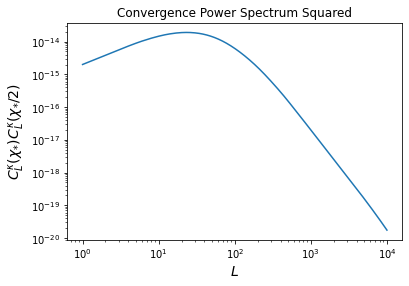

In [4]:
from powerspectra import Powerspectra
from cosmology import Cosmology
power = Powerspectra()
cosmo = Cosmology()
ells = np.arange(1, 10000, 1)
Chi_str = cosmo.get_chi_star()
Cl_kappa1 = power.get_kappa_ps_2source(ells, Chi_str, Chi_str)
Cl_kappa2 = power.get_kappa_ps_2source(ells, Chi_str/2, Chi_str/2)

plt.figure()
plt.loglog(ells, Cl_kappa1*Cl_kappa2, label="2source")
plt.title("Convergence Power Spectrum Squared")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}(\chi _{*})C_L^{\kappa}(\chi _{*}/2)$", fontsize=14)
plt.show()

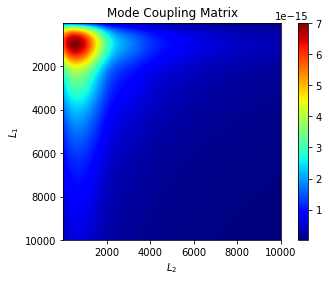

In [22]:
ellmax = 10000
Nell_samples = 100
M_spline = mode.spline(ellmax, Nell_samples)

ellmax_plot = 1000
ells = np.arange(1, ellmax_plot + 1)
M_matrix = M_spline(ells, ells)
plt.imshow(M_matrix, cmap="jet", extent=[1,ellmax,ellmax,1])
plt.xlabel("$L_2$")
plt.ylabel("$L_1$")
plt.title("Mode Coupling Matrix")
plt.colorbar()
plt.show()

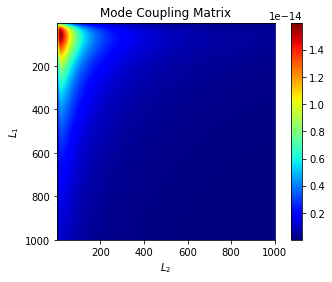

In [21]:
ellmax = 1000
Nell_samples = 100
M_spline = mode.spline(ellmax, Nell_samples)

ells = np.arange(1, ellmax)
M_matrix = M_spline(ells, ells)
plt.imshow(M_matrix, cmap="jet", extent=[1,ellmax,ellmax,1])
plt.xlabel("$L_2$")
plt.ylabel("$L_1$")
plt.title("Mode Coupling Matrix")
plt.colorbar()
plt.show()

In [5]:
from bispectra import Bispectra

t0 = time.time()
bi = Bispectra(M_spline=True)
t1 = time.time()

total = t1-t0
print(total)

21.357579946517944


In [6]:
ells3 = ells1
conv_bi_equi = bi.get_convergence_bispectrum(ells1, ells2, ells3, M_spline=True)

In [7]:
conv_bi_folded = bi.get_convergence_bispectrum(ells1, ells2/2, ells3/2, M_spline=True)

In [8]:
ells_100 = np.ones(np.size(ells1))*100
conv_bi_100 = bi.get_convergence_bispectrum(ells_100, ells2, ells3, M_spline=True)

In [9]:
conv_bi_100_plus100 = bi.get_convergence_bispectrum(ells_100, ells2, ells3 + 100, M_spline=True)

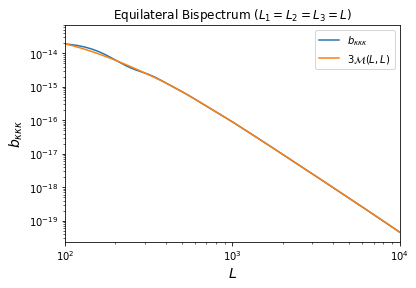

In [10]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="$b_{\kappa\kappa\kappa}$")
plt.loglog(ells1, 3*M, label="$3\mathcal{M}(L,L)$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

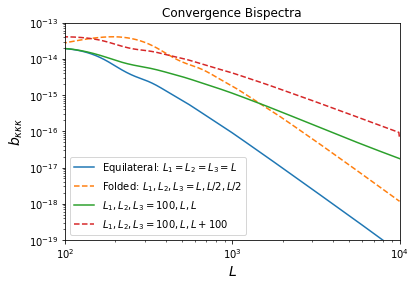

In [11]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="Equilateral: $L_1=L_2=L_3=L$")
plt.loglog(ells1, np.abs(conv_bi_folded), label="Folded: $L_1,L_2,L_3=L,L/2,L/2$", linestyle="--")
plt.loglog(ells1, conv_bi_100, label="$L_1,L_2,L_3=100,L,L$")
plt.loglog(ells1, np.abs(conv_bi_100_plus100), label="$L_1,L_2,L_3=100,L,L+100$", linestyle="--")
plt.title("Convergence Bispectra")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.ylim(1e-19, 1e-13)
plt.legend()
plt.show()